In [7]:
import numpy as np
import pandas as pd
# Load the dataset
file_path = r'DCT_withoutduplicate 5.csv'
data = pd.read_csv(file_path)
  

**Question 1**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


#define a method to seprate features and targets variables.
def split_feature_targrt_var(data, target_variable):
    # Separate features and target variable (taking LABEL as Target variable)
    X = data.drop(columns=target_variable)
    y = data[target_variable]

    return X, y

#define kNN classifire analysis method or function with paramaters data, test_size, n_neighbors.
def knn_classifier_analysis(X, y):

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize a K-Nearest Neighbors classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=3)

    # Train the model
    knn_classifier.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)

    # Find confusion matrix for training and test data
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)

    return conf_matrix_train, conf_matrix_test, y_train, y_train_pred, y_test, y_test_pred
    

#initiling the target variable
target_variable = 'LABEL'

#Calling function 
X, y = split_feature_targrt_var(data, target_variable)    #getting the features, target variables

conf_matrix_train, conf_matrix_test, y_train, y_train_pred, y_test, y_test_pred = knn_classifier_analysis(X, y)    #getting data from the function

# Print confusion matrices
print("Confusion Matrix - Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix - Test Data:")
print(conf_matrix_test)

# Generating classification report for training and test data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))


Confusion Matrix - Training Data:
[[42  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  2]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 38]]

Confusion Matrix - Test Data:
[[ 7  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  1]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  3]]

Classification Report - Training Data:
              precision    recall  f1-score   support

        3333       0.93      0.98      0.95        43
        3334       1.00      1.00      1.00        30
        3335       0.98      0.98      0.98        41
        3337       0.91      1.00      0.95        30
        3342       0.98      1.00      0.99        40
        3346       0.90      1.00      0.95        37
        3349       0.90      0.92      0.91        61
        3351       0.62      0.68      0.65        31
        3352       0.55      0.52      0.53        23
        3353       0.92      1.00      0.9

/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/j

**Question 2**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


def linear_regression_analysis(X_reg, y_reg):
    
    # Split the data into training and test sets
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    # Initialize a Linear Regression model
    regressor = LinearRegression()

    # Train the model
    regressor.fit(X_train_reg, y_train_reg)

    # Predict on test data
    y_pred_reg = regressor.predict(X_test_reg)

    # Calculate metrics
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)

    return mse, rmse, mape, r2

   
#calling the function
X_reg, y_reg = split_feature_targrt_var(data, target_variable) #getting the training the test variables after calling the function
mse, rmse, mape, r2 = linear_regression_analysis(X_reg, y_reg) #getting the mean MSE, RMSE, MAPE and R^2


# Print out metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 2010.1576848806671
Root Mean Squared Error (RMSE): 44.834782088024774
Mean Absolute Percentage Error (MAPE): 0.005274855373537013
R^2 Score: -1.3932508992034278


**Question 3**

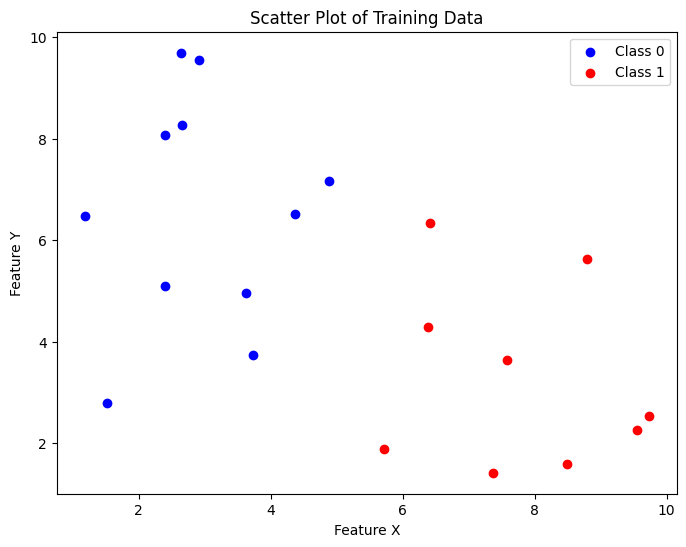

In [16]:
import matplotlib.pyplot as plt
import numpy as np


# Generate random data points for features X and Y(for training set data)
def generate_random_data(n_points):
    np.random.seed(42)
    X_random = np.random.uniform(1, 10, n_points)
    Y_random = np.random.uniform(1, 10, n_points)

    return X_random, Y_random

#function to plot - scatter plot
def scatter_of_random_data(X_random, Y_random):
    
    # Assign classes based on a simple rule: Class 0 if X < 5, Class 1 otherwise
    classes = np.where(X_random < 5, 0, 1)

    # Scatter plot of the training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_random[classes == 0], Y_random[classes == 0], color='blue', label='Class 0')
    plt.scatter(X_random[classes == 1], Y_random[classes == 1], color='red', label='Class 1')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend()
    plt.show()

#Function calling
X_random, Y_random = generate_random_data(n_points = 20)  #getting random data-set for X and Y featurs

scatter_of_random_data(X_random, Y_random)  #calling the function to plot - scatter plot


**Question 4**

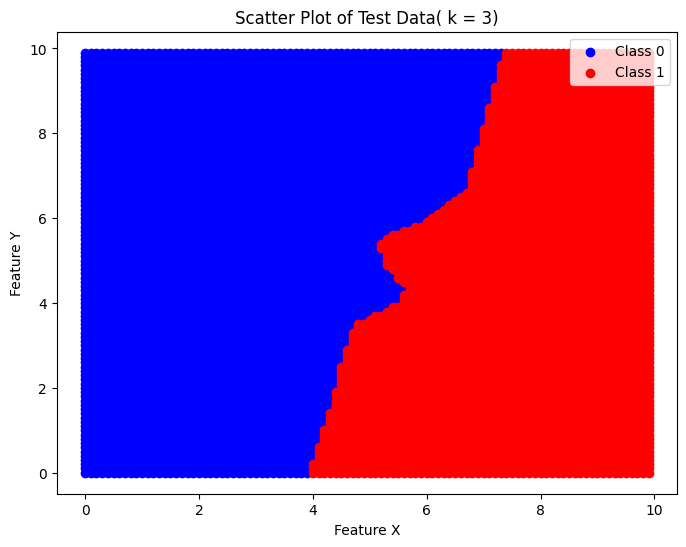

In [28]:
import numpy as np
import matplotlib.pyplot as plt


def knn_classification_and_plot(X_random, Y_random, n_neighbors, grid_range=(0, 10), step=0.1):

    # Assign classes based on a simple rule: Class 0 if X < 5, Class 1 otherwise
    classes = np.where(X_random < 5, 0, 1)

    # Train kNN classifier with training data
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(np.vstack((X_random, Y_random)).T, classes)

    # Generate test set data
    X_test_knn = np.arange(grid_range[0], grid_range[1], step)
    Y_test_knn = np.arange(grid_range[0], grid_range[1], step)
    X_test_grid, Y_test_grid = np.meshgrid(X_test_knn, Y_test_knn)
    X_test_flat = X_test_grid.flatten()
    Y_test_flat = Y_test_grid.flatten()

    # Combine X and Y into a single test set
    test_set = np.vstack((X_test_flat, Y_test_flat)).T

    # Classify test set data
    test_pred = knn.predict(test_set)

    # Scatter plot of the test data classified by kNN
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_flat[test_pred == 0], Y_test_flat[test_pred == 0], color='blue', label='Class 0')
    plt.scatter(X_test_flat[test_pred == 1], Y_test_flat[test_pred == 1], color='red', label='Class 1')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'Scatter Plot of Test Data( k = {n_neighbors})')
    plt.legend()
    plt.show()

#Function calling
X_random, Y_random = generate_random_data(n_points = 20)  #getting random data-set for X and Y featurs

#defining k nearest neighbouring = 3
n_neighbors = 3 
knn_classification_and_plot(X_random, Y_random, n_neighbors, grid_range=(0, 10), step=0.1) #scatter plot of the test data output


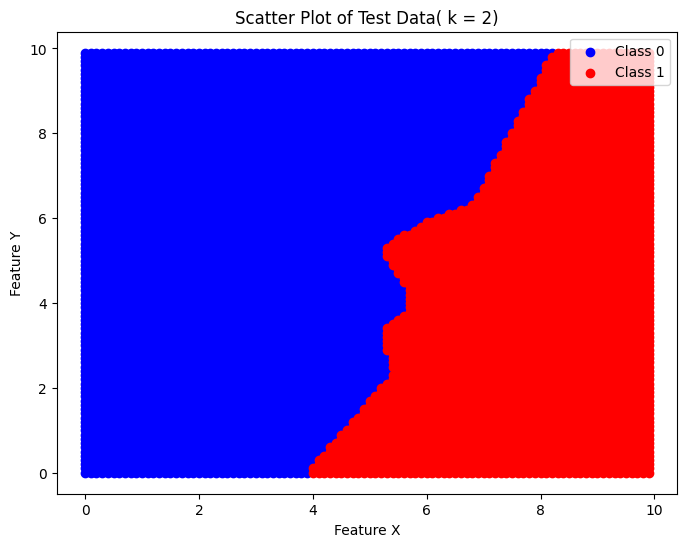

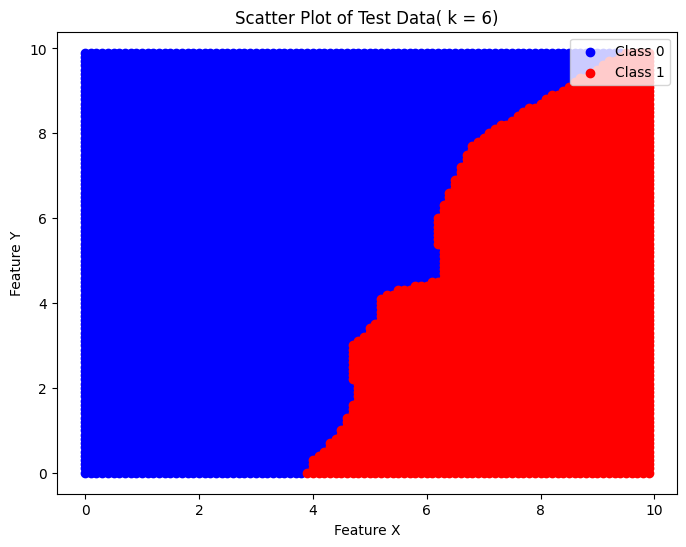

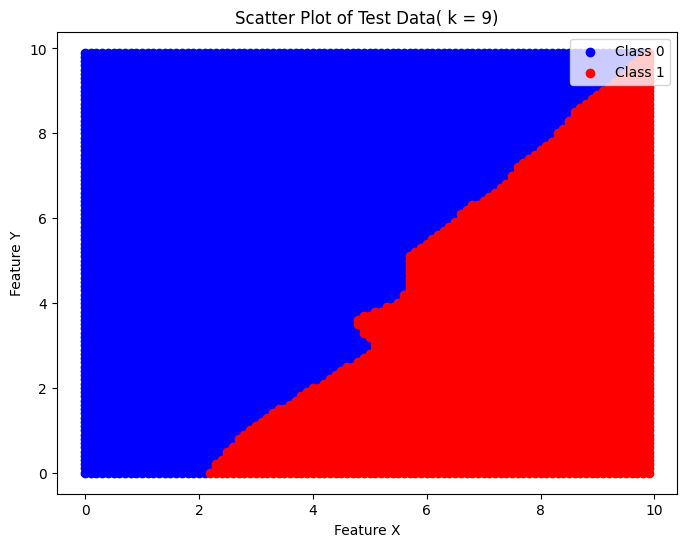

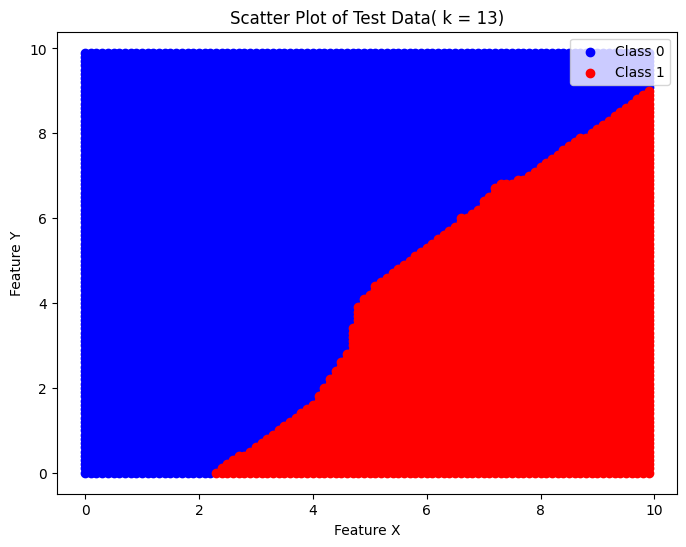

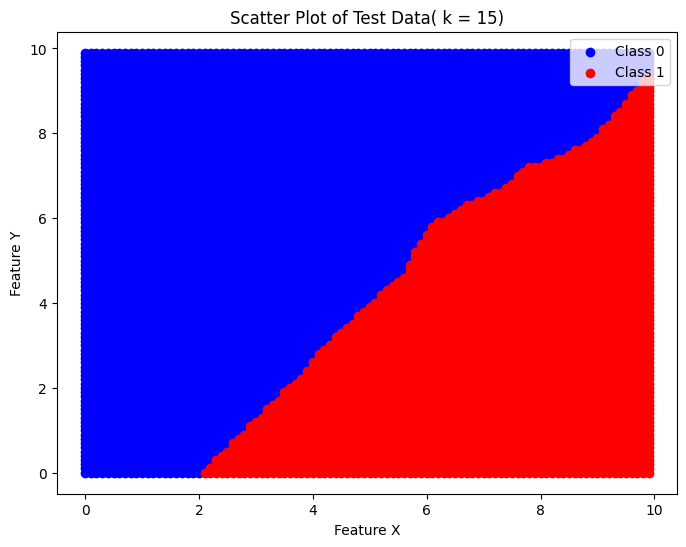

In [29]:
#Repeat above exercise for various values of k and observe the change in the class boundary lines.

#taking different value of K
k = {6, 9, 13, 15, 2}

for i in k:
    n_neighbors = i
    knn_classification_and_plot(X_random, Y_random, n_neighbors, grid_range=(0, 10), step=0.1) #scatter plot of the test data output


In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def randomCV_gridCV_toFind_ideal_k(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # setting knn classifer
    knn = KNeighborsClassifier()
    
    # defining the parameter grid
    param_grid = {'n_neighbors': range(1, 31)}  # Trying k values from 1 to 30
    
    # Using GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # findig ideal k value
    best_k = grid_search.best_params_['n_neighbors']
    
    
    # Test the model with the best k value
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    

    return best_k, accuracy


#calling the function
X, y = split_feature_targrt_var(data, target_variable)  #this method will return features and target variable as X and y resp.

best_k, accuracy = randomCV_gridCV_toFind_ideal_k(X, y)   #this method will return the best ideal value of k and it accuricy

print(f"The best k value is: {best_k}")
print(f"Accuracy of the best kNN model: {accuracy:.2f}")

/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The best k value is: 1
Accuracy of the best kNN model: 0.91
